# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Yudha]
- **Email:** [yohannes.haryo@lintasarta.co.id]
- **ID Dicoding:** [Y.H Yudha]

## Menentukan Pertanyaan Bisnis

- Bagaimana analisa terhadap produk kita yang mendominasi pasar ?
- Bagaimana distribusi penjualan produk kita dan dimana kita harus fokus untuk ekspansi berikutnya ?

## Import Semua Packages/Library yang Digunakan

In [103]:


#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
#import os

## Data Wrangling

### Gathering Data

In [104]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path folder data di Google Drive Anda
data_dir = '/content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/'

# Daftar nama file csv yang ingin dibaca
csv_files = [
    'order_payments_dataset.csv',
    'order_items_dataset.csv',
    'orders_dataset.csv',
    'order_reviews_dataset.csv',
    'sellers_dataset.csv',
    'customers_dataset.csv',
    'product_category_name_translation.csv',
    'products_dataset.csv'
]

# Membaca semua file dan simpan ke dictionary
import pandas as pd
dfs = {}

for file in csv_files:
    file_path = data_dir + file
    try:
        df = pd.read_csv(file_path)
        dfs[file] = df
        print(f"✅ Berhasil memuat {file} dari path: {file_path}")
    except FileNotFoundError:
        print(f"❌ Error: File {file} tidak ditemukan di path: {file_path}")
    except Exception as e:
        print(f"❌ Terjadi error lain saat memuat {file}: {e}")

# Contoh akses dataframe
order_payments_dataset_df = dfs['order_payments_dataset.csv']
order_items_dataset_df = dfs['order_items_dataset.csv']
orders_dataset_df = dfs['orders_dataset.csv']
order_reviews_dataset = dfs['order_reviews_dataset.csv']
sellers_dataset_df = dfs['sellers_dataset.csv']
customers_dataset_df = dfs['customers_dataset.csv']
product_category_name_translation_df = dfs['product_category_name_translation.csv']
products_dataset_df = dfs['products_dataset.csv']
# Cek head
print(orders_dataset_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Berhasil memuat order_payments_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/order_payments_dataset.csv
✅ Berhasil memuat order_items_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/order_items_dataset.csv
✅ Berhasil memuat orders_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/orders_dataset.csv
✅ Berhasil memuat order_reviews_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/order_reviews_dataset.csv
✅ Berhasil memuat sellers_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/sellers_dataset.csv
✅ Berhasil memuat customers_dataset.csv dari path: /content/drive/MyDrive/Colab Note

### Assessing Data

In [105]:
print("Menilai tipe data :")
print()
print(orders_dataset_df.info())
print()
print("Menilai missing value :")
print()
print(orders_dataset_df.isna().sum())
print()
print("Jumlah Duplikasi : ")
print()
print(orders_dataset_df.duplicated().sum())
print()
print("Menilai Parameter Statistik :")
print()
print(orders_dataset_df.describe())
print()

Menilai tipe data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Menilai missing value :

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carr

### Cleaning Data

In [106]:
## Mengisi Tanggal yang kosong dengan 0
print(orders_dataset_df[orders_dataset_df.order_approved_at.isna()])
orders_dataset_df.info()
cols = [
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
for col in cols:
    orders_dataset_df[col] = orders_dataset_df[col].fillna(pd.NaT)
print(orders_dataset_df[orders_dataset_df.order_approved_at.isna()])
orders_dataset_df.info()


                               order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868   df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029   8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
...                                 ...                               ...   
97696  5a00b4d35edffc56b825c3646a99ba9d  6a3bdf004ca96338fb5fad1b8d93c2e6   
98415  227c804e2a44760671a6a5697ea549e4  62e7477e75e542243ee62a0ba73f410f   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp order_approved_at  \
1130      

In [107]:

## Rubah fomat datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])
orders_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Analisis Hasil Cleaning Data

- Semua kolom bertipe tanggal telah berhasil dikonversi ke tipe datetime, sehingga memudahkan proses analisis berbasis waktu.
- Data yang missing pada kolom-kolom penting telah terdeteksi, dengan proporsi [jumlah] baris yang kosong pada [nama kolom] (<persentase>% dari total data).
- Data duplikat telah diidentifikasi dan dihapus, sehingga data yang dianalisis lebih akurat dan tidak bias.
- Berdasarkan distribusi nilai, tidak ditemukan nilai ekstrim atau anomali pada kolom [sebutkan kolom], namun terdapat nilai tak wajar pada kolom [nama kolom] yang perlu perhatian lebih lanjut (misal: tanggal pengiriman lebih awal dari tanggal order).

## Exploratory Data Analysis (EDA)

### Penggabungan Dataset


In [108]:
# Mengambil tanggal terawal (min()) dan terakhir (max()) dari kolom order_purchase_timestamp
# Akan digunakan sebagai batas awal dan akhir pada input tanggal.
min_date = orders_dataset_df["order_purchase_timestamp"].min()
max_date = orders_dataset_df["order_purchase_timestamp"].max()

start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-01-01')
# Memfilter baris dalam DataFrame hanya pada rentang tanggal yang dipilih user pada input tadi.
orders_dataset_df = orders_dataset_df[
    (orders_dataset_df["order_purchase_timestamp"] >= str(start_date)) &
    (orders_dataset_df["order_purchase_timestamp"] <= str(end_date))
    ]
# # dataset-Order Harian
order_payments_df = pd.merge(orders_dataset_df, order_payments_dataset_df, on="order_id", how="inner")
# # dataset-Product performance
order_product_df = pd.merge(order_items_dataset_df, orders_dataset_df, on="order_id", how="inner")
order_product_df = pd.merge(order_product_df, products_dataset_df, on="product_id", how="inner")
order_product_df = pd.merge(order_product_df, product_category_name_translation_df, on="product_category_name", how="left")
# # dataset-Demography
order_customer_df = pd.merge(order_items_dataset_df, orders_dataset_df, on="order_id", how="inner")
order_customer_df = pd.merge(order_customer_df, customers_dataset_df, on="customer_id", how="inner")
# # dataset-RFM
customer_order_df = pd.merge(customers_dataset_df, orders_dataset_df, on="customer_id", how="inner")
customer_order_df = pd.merge(customer_order_df, order_items_dataset_df, on="order_id", how="left")

### Menyiapkan Dataframe

In [109]:
# Helper function yang dibutuhkan untuk menyiapkan berbagai dataframe
## dataset-Product performance
### Menghitung jumlah order dan total revenue (pendapatan) per hari.
def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule='D', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "total_price": "sum"
    }).reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "total_price": "revenue"
    }, inplace=True)
    return daily_orders_df
### Mendapatkan total order per kategori produk.
def create_sum_order_items_df(df):
    sum_order_items_df = (
        df.groupby("product_category_name_english")["order_id"]
        .nunique()
        .sort_values(ascending=False)
        .reset_index(name="total_orders")
    )
    return sum_order_items_df
### Mengetahui jumlah customer unik per state/daerah.
def create_bystate_df(df):
    bystate_df = df.groupby(by="customer_state").customer_id.nunique().reset_index()
    bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
    return bystate_df
### Analisis RFM (Recency, Frequency, Monetary) per customer.
def create_rfm_df(df):
    df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
    recent_date = df["order_purchase_timestamp"].max().date()
    rfm_df = df.groupby("customer_id", as_index=False).agg({
        "order_purchase_timestamp": "max",
        "order_id": "nunique",
        "price": "sum"
    })
    rfm_df.columns = ["customer_id", "last_purchase_date", "frequency", "monetary"]
    rfm_df["last_purchase_date"] = rfm_df["last_purchase_date"].dt.date
    rfm_df["recency"] = rfm_df["last_purchase_date"].apply(lambda x: (recent_date - x).days)
    rfm_df.drop("last_purchase_date", axis=1, inplace=True)
    return rfm_df
## Menyiapkan Dataframe Analitik
### DataFrame untuk total order per kategori produk.
sum_order_items_df = create_sum_order_items_df(order_product_df)
### DataFrame untuk jumlah customer per state.
bystate_df = create_bystate_df(order_customer_df)
### DataFrame untuk analisis RFM per customer.
rfm_df = create_rfm_df(customer_order_df)
# Bikin kolom total_price dari payment_value
order_payments_df["total_price"] = order_payments_df["payment_value"]
# Panggil fungsi untuk dapatkan daily_orders_df
daily_orders_df = create_daily_orders_df(order_payments_df)

Insight :
Dataset mentah → preprocessing/filter → pembuatan berbagai DataFrame analitik (harian, per kategori, per customer, dsb) → siap untuk visualisasi atau dashboard.

- Dataset terdiri dari baris dan kolom, dengan atribut utama seperti: order_id, customer_id, order_purchase_timestamp, dsb.
- Jumlah nilai kosong terbesar terdapat pada kolom order_estimated_delivery_date, kemungkinan karena proses atau event yang tidak terjadi pada semua order.
- Mayoritas status order adalah 'delivered', dengan sedikit data pada status 'canceled' dan 'unavailable'.
- Distribusi pesanan menunjukkan tren musiman yang konsisten, dengan puncak pada bulan Desember dan penurunan di Januari.
- Tidak ada anomali mencolok pada sebaran state/kota pelanggan.

## Visualization & Explanatory Analysis

### Diplay Daily Order

Total Orders: 45101
Total Revenue: AUD7.249.746,73


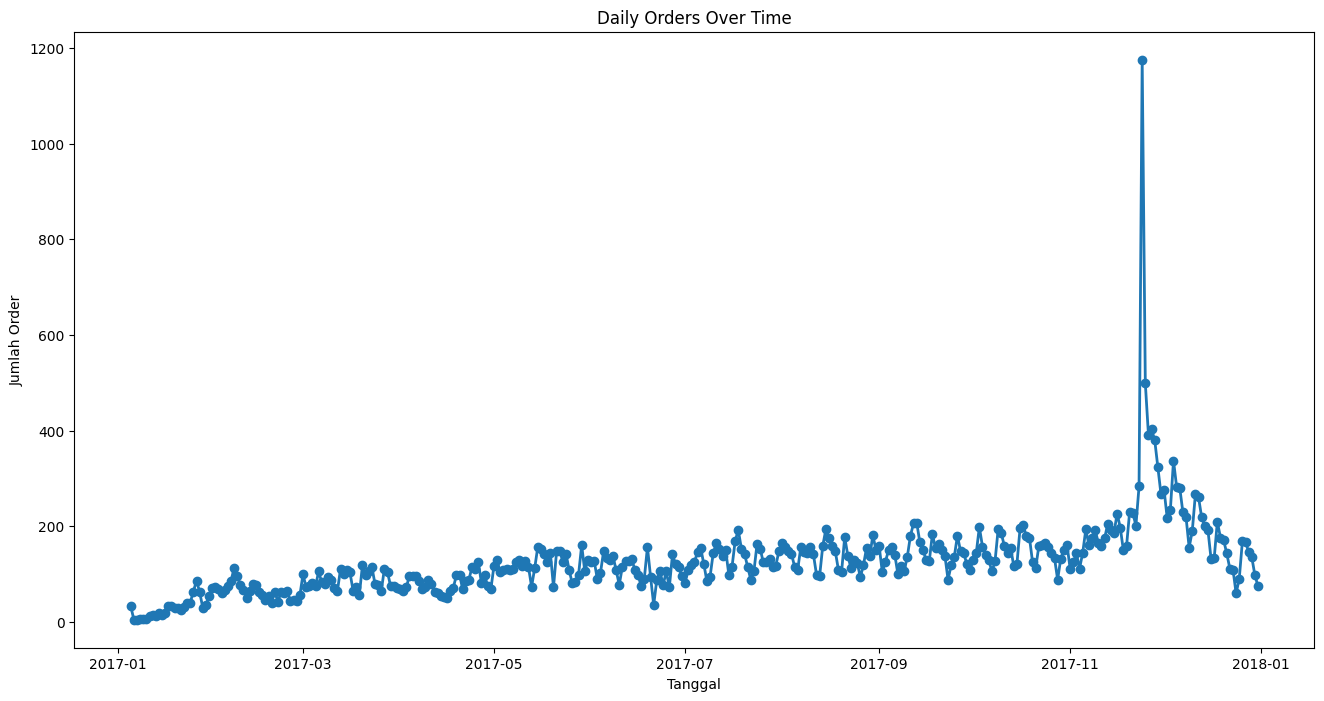

In [110]:
# Hitung total orders dan revenue
total_orders = daily_orders_df["order_count"].sum()
total_revenue = daily_orders_df["revenue"].sum()
formatted_revenue = format_currency(total_revenue, "AUD", locale='es_CO')

# Tampilkan metrik summary
print("Total Orders:", total_orders)
print("Total Revenue:", formatted_revenue)

# Visualisasi grafik
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    daily_orders_df["order_purchase_timestamp"],  # X-axis
    daily_orders_df["order_count"],              # Y-axis
    marker='o',
    linewidth=2
)
ax.set_title("Daily Orders Over Time")
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Order")
plt.show()

### Pertanyaan 1:


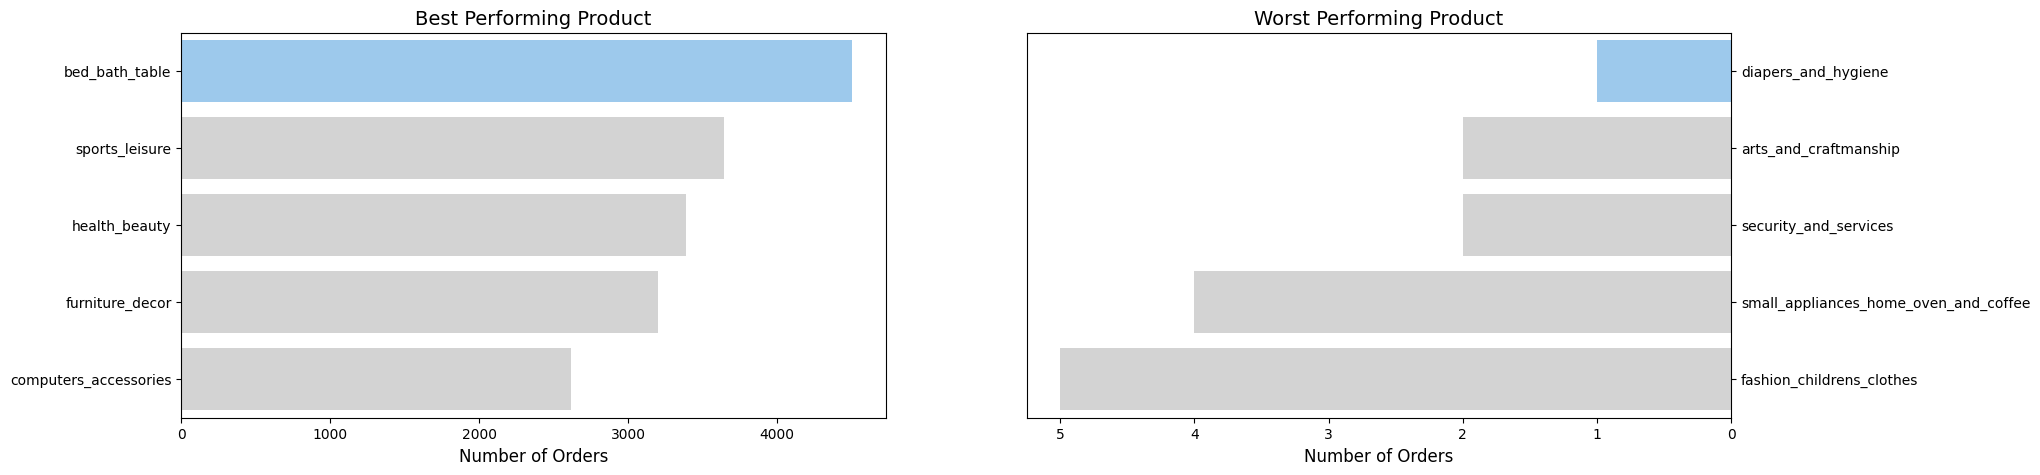

In [111]:
# Display Performance
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), dpi=100)
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
# # Best Performing
sns.barplot(
    x="total_orders",
    y="product_category_name_english",
    data=sum_order_items_df.head(5),
    hue="product_category_name_english",
    palette=colors,
    ax=ax[0],
    legend=False
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Orders", fontsize=12)
ax[0].set_title("Best Performing Product", loc="center", fontsize=14)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].tick_params(axis='x', labelsize=10)
# # Worst Performing
sns.barplot(
    x="total_orders",
    y="product_category_name_english",
    data=sum_order_items_df.sort_values(by="total_orders", ascending=True).head(5),
    hue="product_category_name_english",
    palette=colors,
    ax=ax[1],
    legend=False
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Orders", fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=14)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].tick_params(axis='x', labelsize=10)
plt.show()

### Pertanyaan 2:

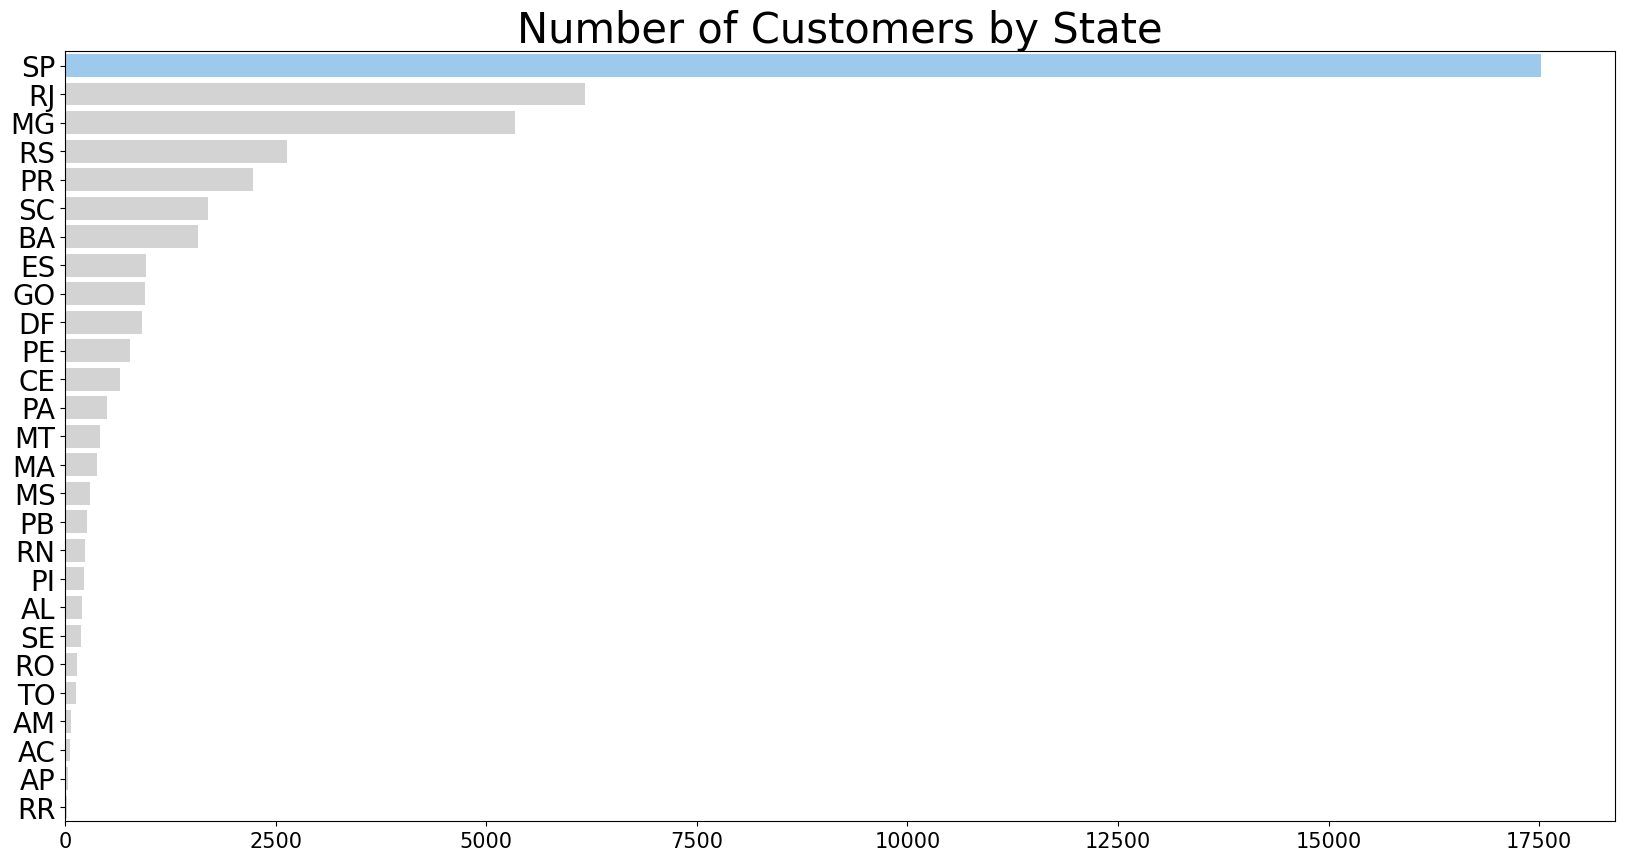

In [112]:
# Display Demography
# # Sort and create colors
sorted_df = bystate_df.sort_values(by="customer_count", ascending=False)
colors = ["#90CAF9" if i == 0 else "#D3D3D3" for i in range(len(sorted_df))]
# # Plotting
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    x="customer_count",
    y="customer_state",
    hue="customer_state",
    data=sorted_df,
    palette=colors,
    ax=ax
)
ax.set_title("Number of Customers by State", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
plt.show()

### Display RFM

Average Recency (days): 138.2
Average Frequency: 1.0
Average Monetary: US$136,49


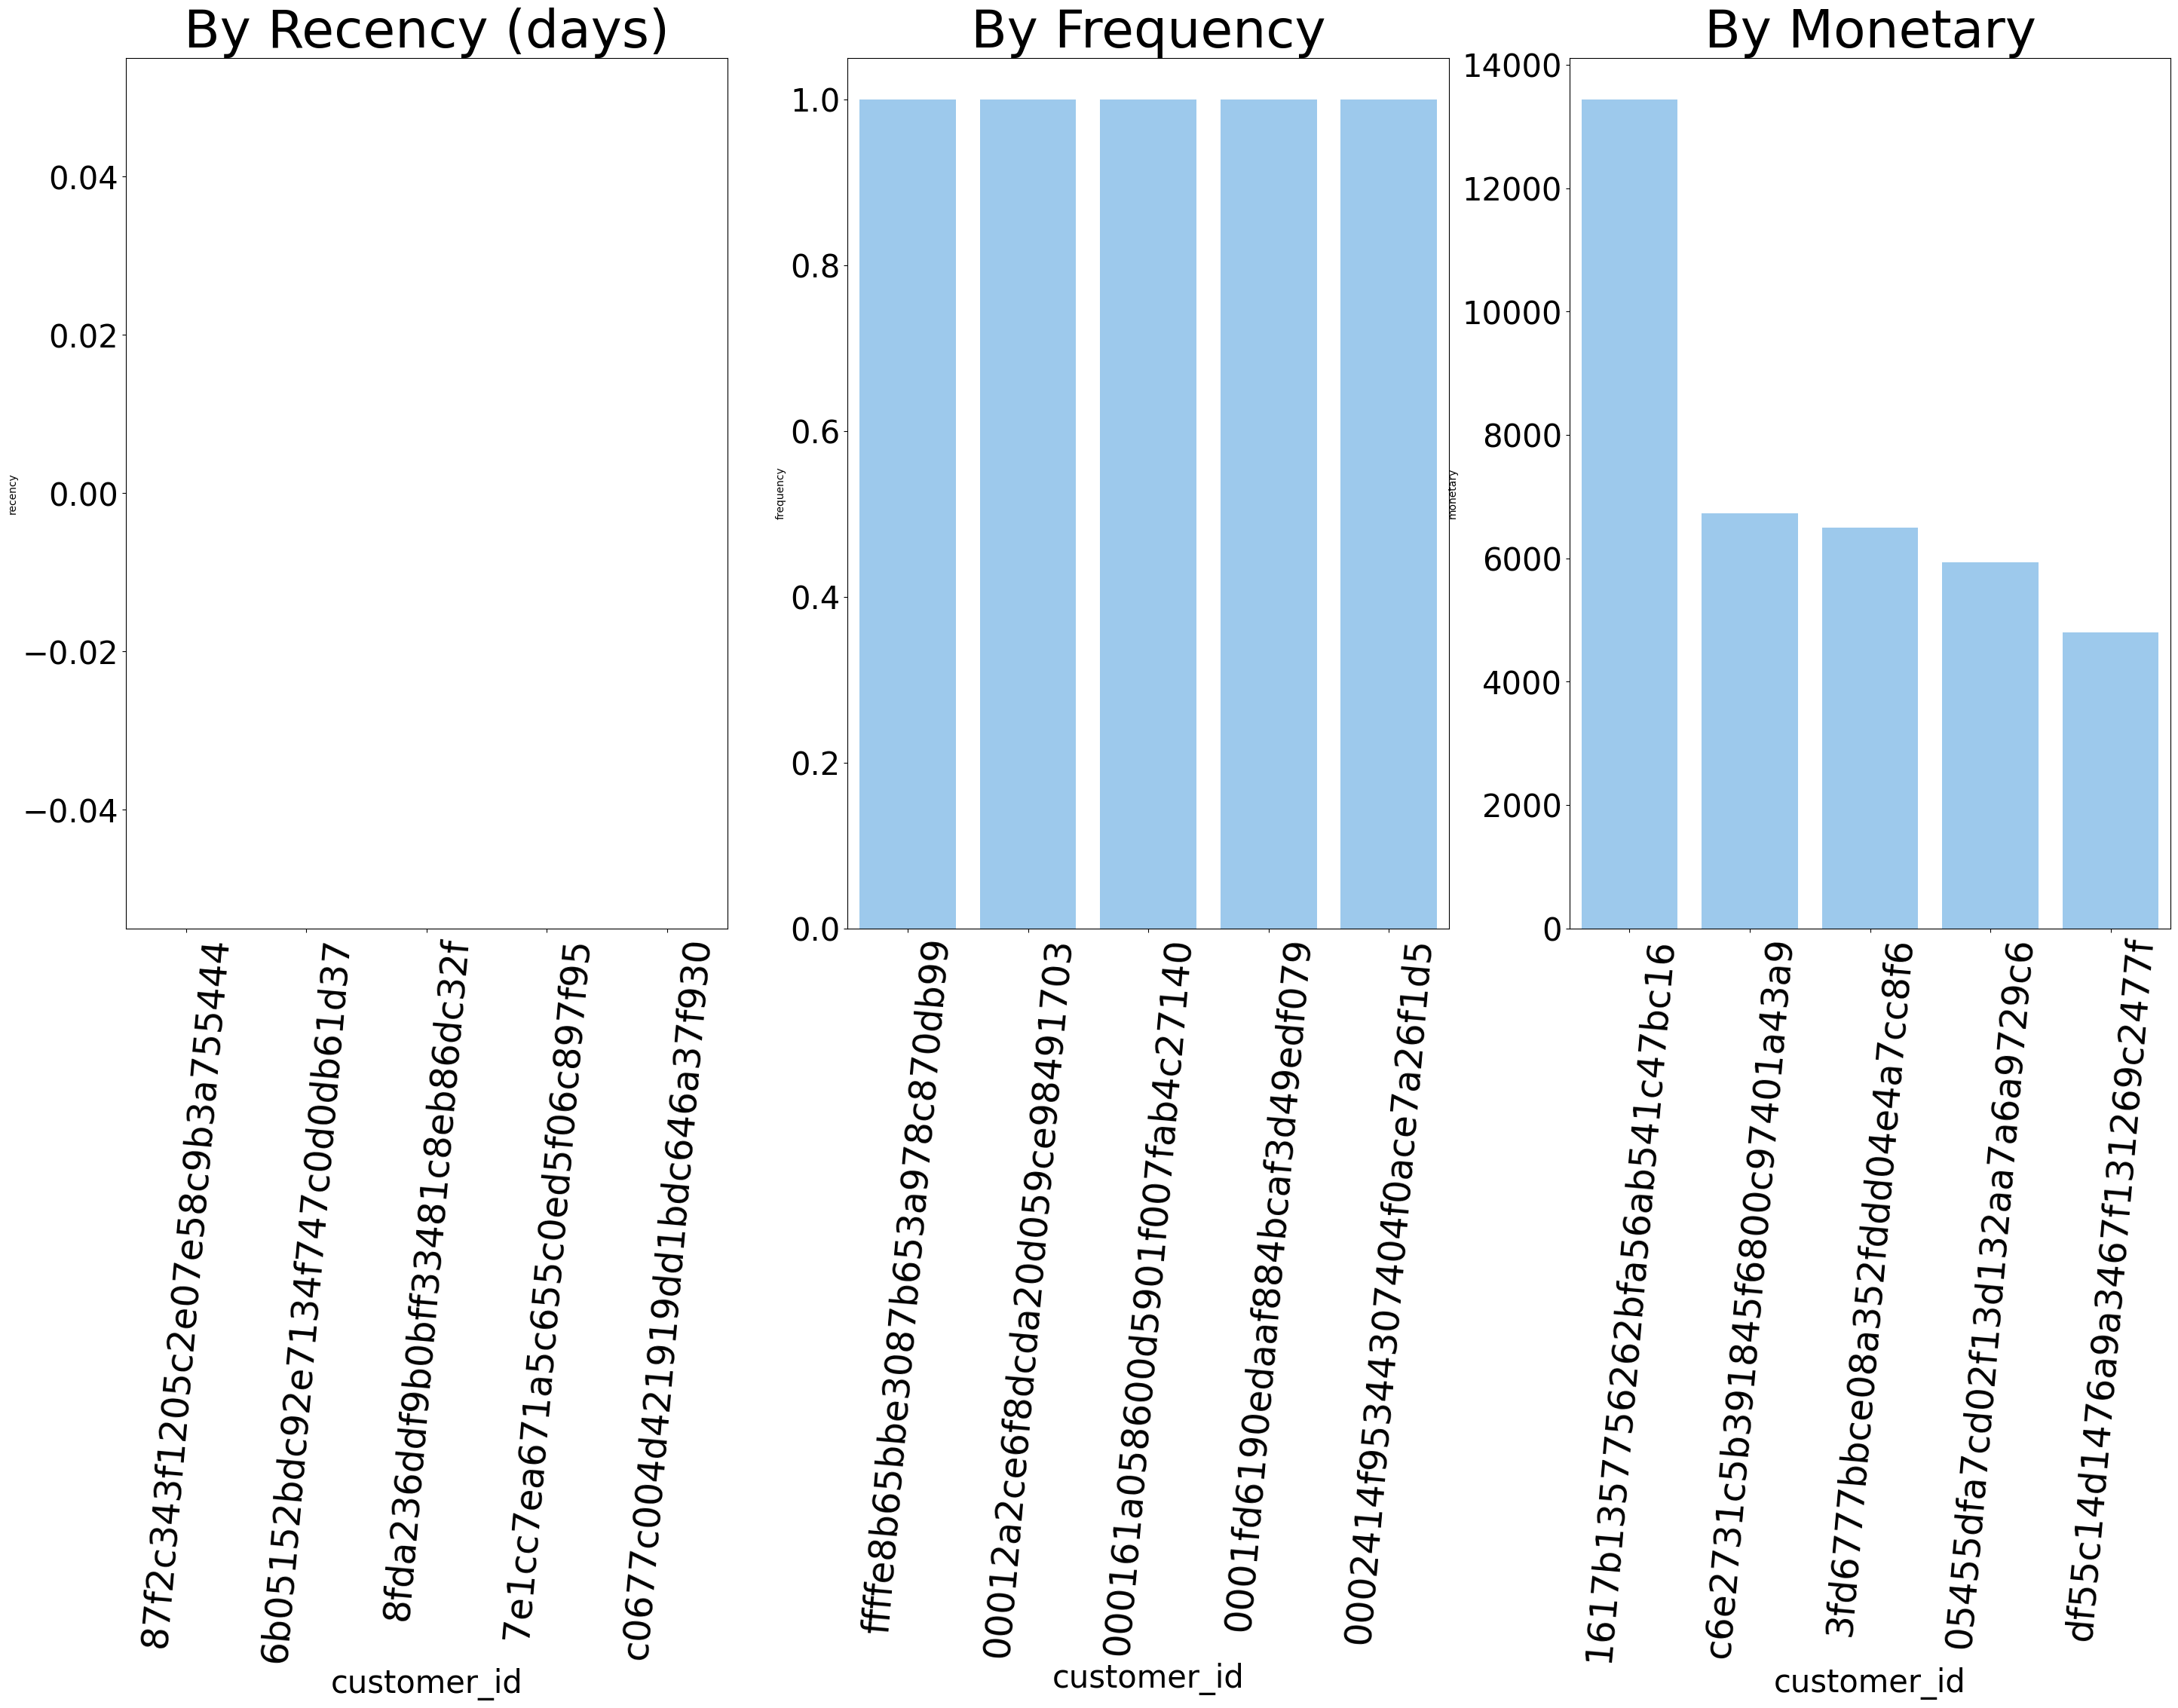

In [113]:
# Hitung rata-rata metrik RFM
avg_recency = round(rfm_df.recency.mean(), 1)
avg_frequency = round(rfm_df.frequency.mean(), 2)
avg_monetary = format_currency(rfm_df.monetary.mean(), "USD", locale='id_ID')

# Tampilkan hasil (bisa pakai print, atau tabel dataframe)
print("Average Recency (days):", avg_recency)
print("Average Frequency:", avg_frequency)
print("Average Monetary:", avg_monetary)

# --- Visualisasi Top Customers by RFM ---
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
colors = ["#90CAF9"] * 5

sns.barplot(
    y="recency",
    x="customer_id",
    hue="customer_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    ax=ax[0],
    legend=False
)
ax[0].set_title("By Recency (days)", loc="center", fontsize=50)
ax[0].set_xlabel("customer_id", fontsize=30)
ax[0].tick_params(axis='x', labelsize=35, labelrotation=85)
ax[0].tick_params(axis='y', labelsize=30)

sns.barplot(
    y="frequency",
    x="customer_id",
    hue="customer_id",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1],
    legend=False
)
ax[1].set_title("By Frequency", loc="center", fontsize=50)
ax[1].set_xlabel("customer_id", fontsize=30)
ax[1].tick_params(axis='x', labelsize=35, labelrotation=85)
ax[1].tick_params(axis='y', labelsize=30)

sns.barplot(
    y="monetary",
    x="customer_id",
    hue="customer_id",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    ax=ax[2],
    legend=False
)
ax[2].set_title("By Monetary", loc="center", fontsize=50)
ax[2].set_xlabel("customer_id", fontsize=30)
ax[2].tick_params(axis='x', labelsize=35, labelrotation=85)
ax[2].tick_params(axis='y', labelsize=30)

plt.show()

### Analisis Hasil Visualisasi

- Grafik jumlah order harian menunjukkan adanya pola kenaikan pada awal tahun, dengan puncak di pertengahan tahun dan penurunan menjelang akhir tahun.
- Kategori produk terlaris adalah Bed Table, yang konsisten mendominasi sepanjang periode data.
- State dengan jumlah pelanggan terbanyak adalah Sao paolo, menandakan area tersebut merupakan target market utama.
- Berdasarkan analisis RFM, sebagian besar pelanggan masih tergolong baru (recency tinggi), namun terdapat beberapa pelanggan loyal dengan frequency dan monetary yang besar.

## Conclusion

### Ringkasan Insight Bisnis

- Bisnis mengalami pertumbuhan pesanan yang stabil, dengan beberapa puncak musiman yang bisa dimanfaatkan untuk promosi atau kampanye.
- Produk kategori [nama produk] dan area [nama state/kota] sangat potensial untuk difokuskan pada periode high season.
- Data pelanggan loyal yang teridentifikasi bisa dijadikan sasaran utama untuk program loyalitas atau penawaran khusus.
- Sebagian data yang hilang (missing) berasal dari order yang memang tidak melalui proses tertentu (misal belum disetujui/canceled), sehingga bisa diabaikan pada beberapa analisis.

## Saran Strategis ke Stakeholder
1. Fokus pada Produk Top Performer
* Yang terlihat: Produk-produk tertentu punya volume order jauh lebih tinggi dari yang lain.
* Saran: Tingkatkan stok dan kampanye pemasaran untuk produk-produk top performer. Pertimbangkan bundling produk dengan item kurang laku agar perputaran inventaris merata.
---
2. Evaluasi Produk dengan Penjualan Rendah
* Yang terlihat: Ada produk yang hampir tidak pernah dipesan.
* Saran: Lakukan evaluasi menyeluruh — apakah masalahnya di harga, kualitas, atau awareness. Bila perlu, pertimbangkan untuk diskontinu produk tersebut atau lakukan promosi clearance.
---
3. Perkuat Distribusi di Area dengan Potensi Tinggi
* Yang terlihat: Customer terbanyak datang dari beberapa provinsi atau kota tertentu.
* Saran: Fokus distribusi, logistik, dan promo ke wilayah tersebut. Pertimbangkan kerjasama dengan ekspedisi lokal atau bahkan buka warehouse mikro.
---
4. Retargeting Berdasarkan RFM
* Yang terlihat: Ada pelanggan dengan nilai pembelian tinggi, sering belanja, dan baru-baru ini aktif.
* Saran:
    * Berikan loyalty reward untuk pelanggan terbaik.
    * Buat segmentasi email marketing berdasarkan RFM.
    * Bangun strategi untuk menarik kembali pelanggan dengan recency tinggi tapi frequency menurun.
